# Kaggle Housing Data

This is note book takes kaggle housing dataset and uses supervised learning techniques to rpredict the price of a house

Before we dig in, there are certain aspects of machine learning algorithms common to all programs. So listed below are the steps commonto all most ML implementations.<br>
<ol> 
    <li>Frame the problem</li> 
    <li>Get Data from sources </li>
    <li>Explore the data</li>
    <li>Data Preprocessing</li>
    <li>Explore different ML models and shortlist the best ones</li>
    <li>Fine tune the model and combine if required</li>
    <li> Present Solution</li>
</ol>
<br>
In this case we already have the first two points defined, Our obkective or problem is to predict the house price given a certain number of features and our source of data is already organized thanks to kaggle. We will directly jump to third step which is Data exploration phase</br>

## Data Exploration

The below cell declares all the import statements used throughout this notebook

In [53]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
from pandas.plotting import scatter_matrix

In [2]:
raw_housing_data_train = pd.read_csv('data/train.csv')
raw_housing_data_test = pd.read_csv('data/test.csv')

In the above data, it is already divided into train and test data. But in real life we need to seggerate the same and after seggregation not look into test data ever while exploration

In [3]:
raw_housing_data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In all there are 81 features. In due course of this notebook, we will look at each ffeature closely and modify, encode or even drop the features as and when we think it is nessecary with proper justification. One thing to keep in mind, is that whatever modifications we do in the training data set we need to do the same modification in our test data set.

In [10]:
raw_housing_data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Removing the sale price as that is our target variable and storing it in another dataframe.
Since the data is already divided into train and test we do not need to remove the same sale price feature from our test data as this already does not have the same

In [11]:
X_train = raw_housing_data_train.drop('SalePrice',axis=1)
x_test=raw_housing_data_train['SalePrice']


In [12]:
X_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


We will have a just overview of the data we have to gain more insight into this. Once we understand the data we will have a better intuition about how to deal with missing values and non numerical data and as such.<br>
Drawing a graph on all possible values

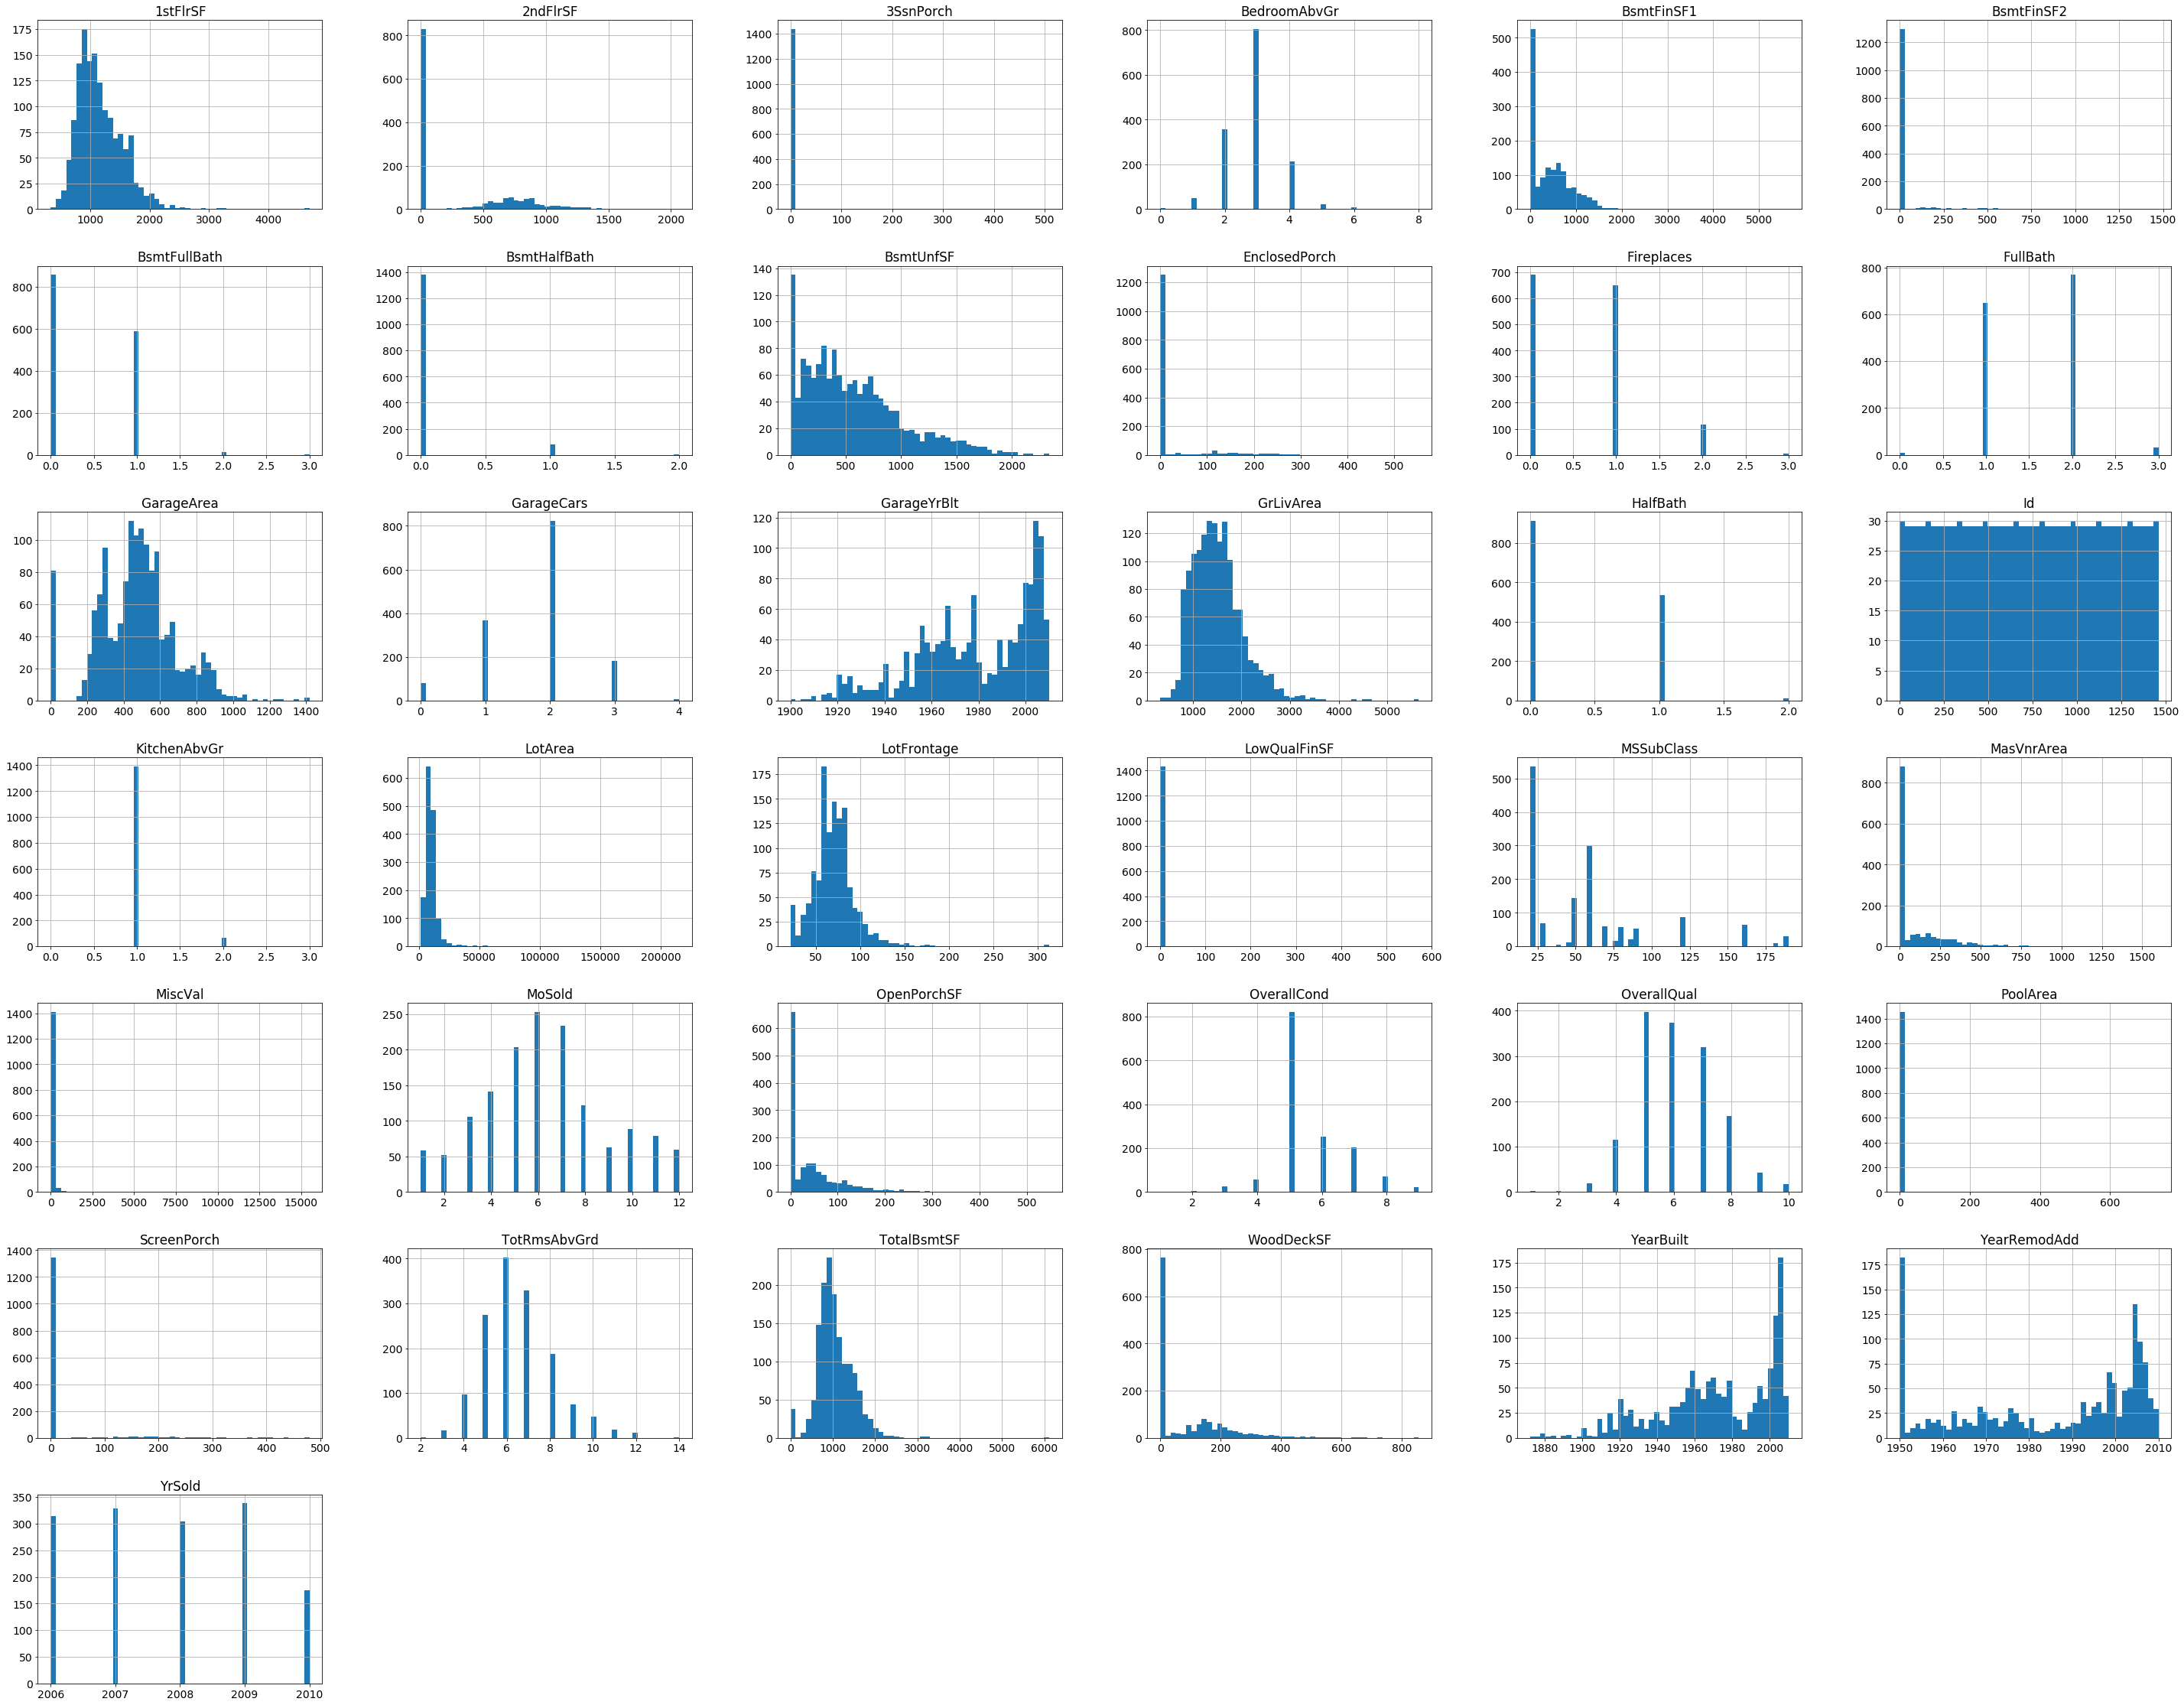

In [29]:
rcParams['font.size'] = 14
rcParams['lines.linewidth'] = 2
rcParams['figure.figsize'] = (50, 40)
X_train.hist(bins=50)
plt.show()

The graphs are plotted only for numerical values. So in the preprocessing stage we need to apply transformation if required. And then we need to take care of non categorical values. We see dome graphs are left skewed and hardly any graph is normal in nature.Next we will just have a look at correlations bewteen values of select few and then we will move to detailed exploration

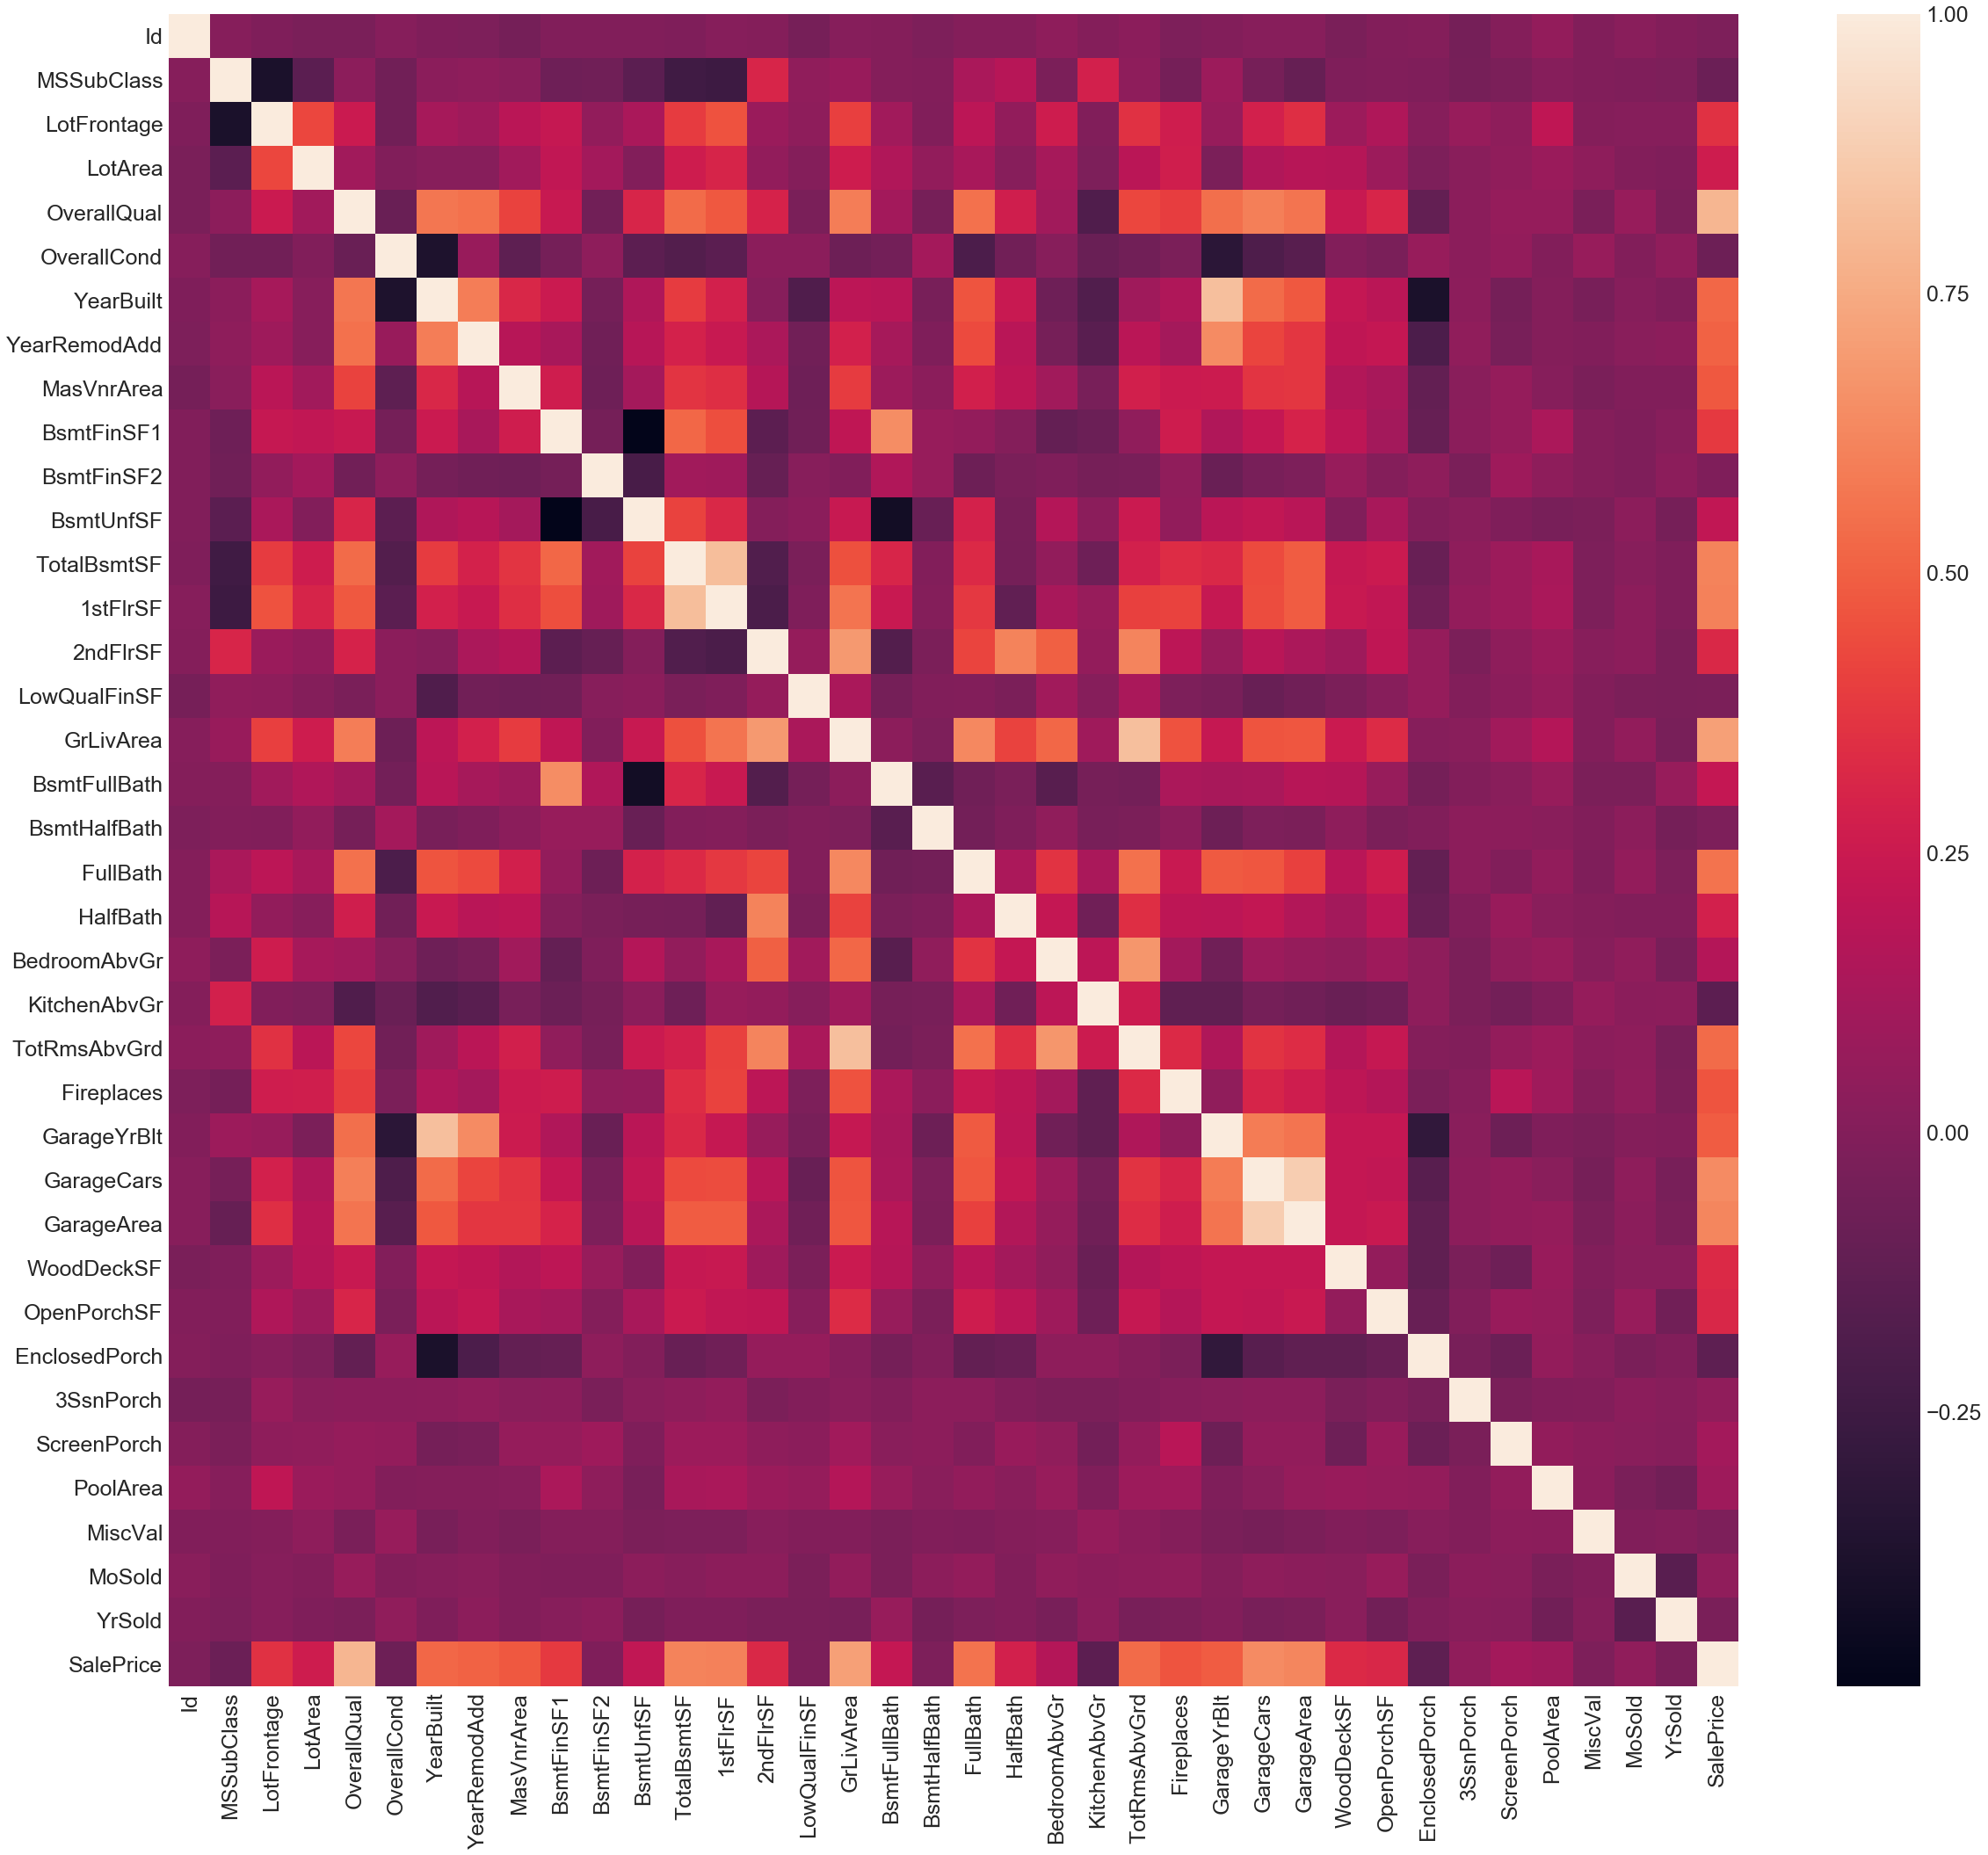

In [47]:
sb.set(font_scale=2.5)
plt.subplots(figsize=(40,35))
corr = raw_housing_data_train.corr()

sb.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

Whoa! that is some complicated image we are looking at. This is the correlation matrix of every element with every other element. The diagnal line indicates value of 1 as every attribute correlates to itself as one. For simplicity sake let us consider only the correlation between house sale price and other features.

In [50]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

So we see the most influential factors for Sale Price are OverAll Quality,, GrLivAtra, garage Cars, garage Area,Total Basement area and 1st Floor Surface area in descending order. SO we must be very careful while dealing with these five features. Now that we have general idea about the data, we will go about cleaning and make the data ready fro processing by Machine Learning algorithms.<br>
Since there are 80 features in all, we will be go about making changes in small small groups for convinience and simplicity sake

## Data Preprocessing 

### 1. Dealing with Numerical data


Below count function shows the count of rows excluding NaN values. The NaN rows mus be removed or values extrapolated or median value must be filled up , depending on hpw many rows are having NaN. Looking at first of all let us have a look at the top 5 features which affect the sale price as from the above list. <br>

To make it fun, lets keep count of the number of colums which are processed, <b>ColProcessed=0<b>

In [71]:
raw_housing_data_train.loc[:, ['OverallQual', 'GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF']].count()


OverallQual    1460
GrLivArea      1460
GarageCars     1460
GarageArea     1460
TotalBsmtSF    1460
1stFlrSF       1460
dtype: int64

The Good news is none of the 5 columns have any missing values. So we will be only considering removing outliers for these 5 attributes

In [72]:
raw_housing_data_train.count().sort_values().head(10)

FireplaceQu      770
LotFrontage     1201
GarageType      1379
GarageYrBlt     1379
GarageFinish    1379
GarageQual      1379
GarageCond      1379
BsmtFinType2    1422
BsmtExposure    1422
BsmtFinType1    1423
dtype: int64

The above count retruns the count of features in ascending order.  From the first 10 we see that we can safely remove first 4 features as the amount of data present is quite insignificant compared to the total number of row. The feature FireplaceQu has has almost half number of records. So this puts us into kind of dillema as to delete or keep the column. While Foreplace is a significant feature so I have deicded to keep the feature for now, treating the values absent as No. From curiosity perspective I can always come back, delete this feature and test the model again.<br>
<b>ColProcessed = 4</b> after the below cells execute

In [69]:
raw_housing_data_train.drop('PoolQC',axis=1,inplace=True)
raw_housing_data_train.drop('MiscFeature',axis=1,inplace=True)
raw_housing_data_train.drop('Alley',axis=1,inplace=True)
raw_housing_data_train.drop('Fence',axis=1,inplace=True)

In [70]:
raw_housing_data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
